In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9074074074074074, Loss: 0.47532392431188514
Checkpoint 200, Accuracy: 0.9135802469135802, Loss: 0.40460325170446326
Checkpoint 300, Accuracy: 0.9197530864197531, Loss: 0.3632182721738462
Checkpoint 400, Accuracy: 0.9382716049382716, Loss: 0.32924298886899594
Checkpoint 500, Accuracy: 0.9444444444444444, Loss: 0.30059309358950015


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.0877513  0.9104538  0.00179498]
[0. 1. 0.] <-> [6.8200439e-01 3.1736314e-01 6.3242018e-04]
[1. 0. 0.] <-> [0.8815542  0.04702584 0.07141992]
[1. 0. 0.] <-> [0.9283469  0.04485257 0.02680055]
[0. 0. 1.] <-> [0.13673379 0.00453838 0.8587278 ]
[0. 0. 1.] <-> [0.1477752  0.00342134 0.8488035 ]
[1. 0. 0.] <-> [0.8298736  0.04329405 0.12683235]
[1. 0. 0.] <-> [0.87865    0.11917426 0.00217571]
[0. 1. 0.] <-> [6.2191093e-01 3.7763533e-01 4.5374935e-04]
[1. 0. 0.] <-> [0.91103864 0.07044004 0.01852126]
[1. 0. 0.] <-> [0.9040217  0.08936399 0.00661436]
[1. 0. 0.] <-> [0.89840156 0.09772259 0.00387591]
[1. 0. 0.] <-> [0.69840974 0.2991807  0.0024095 ]
[0. 1. 0.] <-> [0.15341029 0.84463054 0.00195919]
[1. 0. 0.] <-> [0.8430613  0.15430154 0.00263713]
[1. 0. 0.] <-> [0.92987365 0.06223886 0.00788748]
[0. 1. 0.] <-> [0.48235935 0.5167698  0.00087083]
[0. 1. 0.] <-> [0.5414686  0.4571623  0.00136909]
[1. 0. 0.] <-> [0.85930717 0.13839579 0.00229702]
[1. 0. 0.] <-> [0.87051445 0.127

In [12]:
# Testing Performance

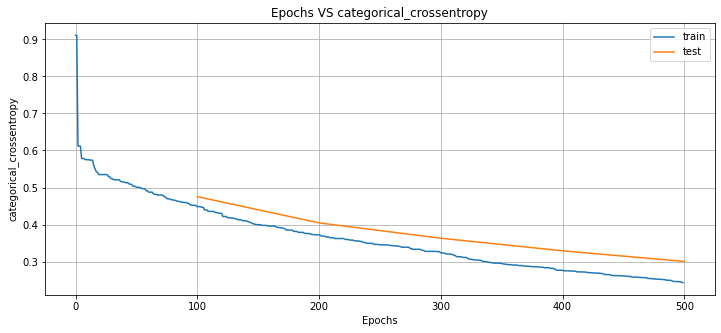

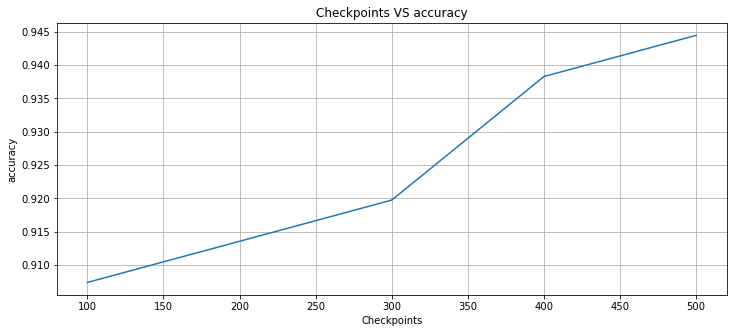

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9074074074074074, 'mean_square_error': 0.2522464319795099, 'categorical_crossentropy': 0.47532392431188514, 'precision': 0.8611111111111112, 'recall': 0.8611111111111112, 'f1': 0.8611111111111112, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 15, 'tn_hit': 15, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 7}, 2: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 8}}, 'checkpoint': 100} 


{'accuracy': 0.9135802469135802, 'mean_square_error': 0.21376424822692972, 'categorical_crossentropy': 0.40460325170446326, 'precision': 0.8703703703703703, 'recall': 0.8703703703703703, 'f1': 0.8703703703703703, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 14, 'tn_hit': 16, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 7}, 2: {'tp_hit': 7, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 7}}, 'checkpoint': 200} 


{'accuracy': 0.9197530864197531, 'mean_square_error': 0.1894744351616771, 'categorical_crossentropy': 0.3632182721738462, 'precision'

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-1.0291936   2.2160022   2.988388   -0.98538154 -2.8766868 ]
 bias: 1.725766658782959

Neuron 1: weights:
[-0.12899348 -2.442777   -0.43491524  2.4622328  -0.2901779 ]
 bias: 1.373373031616211

Neuron 2: weights:
[-1.4785954   0.04039954  1.2457963   2.5821564  -1.8602588 ]
 bias: -2.0626800060272217

Neuron 3: weights:
[-2.8889844   0.39272028  1.5696211   0.7865782  -0.56340504]
 bias: 1.9777096509933472

$
Layer 2
Neuron 0: weights:
[ 2.9661248   2.2158086  -1.8507799   0.98806983]
 bias: 2.101228713989258

Neuron 1: weights:
[2.8617084  0.30633315 1.2187197  2.6272848 ]
 bias: -0.1257360279560089

Neuron 2: weights:
[-2.125422   3.         2.1758044 -2.4598413]
 bias: 2.763157606124878

$

